To Predict the Models forecasting Applications using real time data sets.

In [10]:
%pip install statsmodels

import pandas as pd

# Load dataset
data = pd.read_csv('daily-min-temperatures.csv', 
    index_col='Date', parse_dates=True)

data.head()


Note: you may need to restart the kernel to use updated packages.


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [11]:
# Resample to ensure regular time intervals and fill missing values
data = data.asfreq('D')  # Set frequency to daily
data['Temp'].interpolate(method='linear', inplace=True)  # Interpolate missing values

# Handle NaNs, infinity, or large values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Rename column for clarity (optional)
data.rename(columns={'Temp': 'Temperature'}, inplace=True)

In [12]:
# Verify the data for any remaining issues
print("Check for NaNs, infinity, or large values after preprocessing:")
print(data.isna().sum())
print(np.isinf(data).sum())
print((data['Temperature'] > np.finfo(np.float64).max).sum())

Check for NaNs, infinity, or large values after preprocessing:
Temperature    0
dtype: int64
Temperature    0
dtype: int64
0


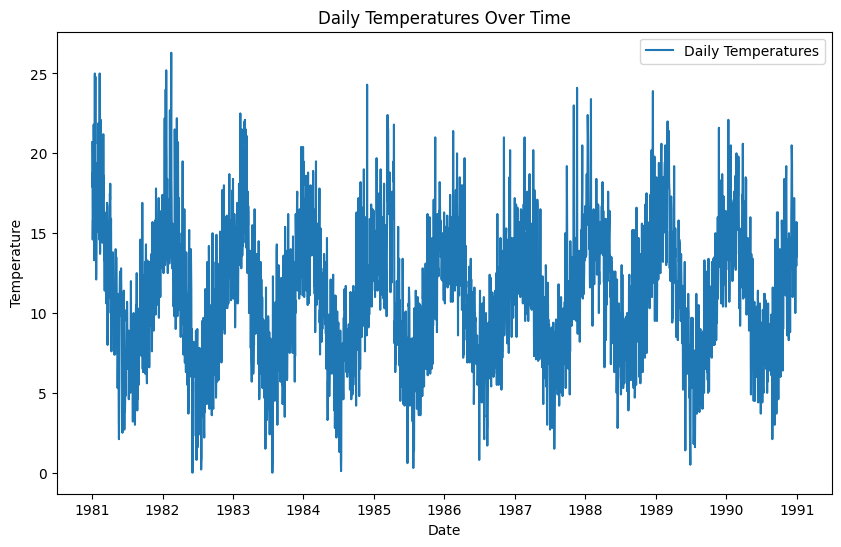

In [13]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Temperature'], label='Daily Temperatures')
plt.title('Daily Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
train, test = train_test_split(data['Temperature'], test_size=0.2, shuffle=False)

# Validate data post-splitting
print("Check training and testing sets for NaNs or invalid values:")
print(f"Train NaNs: {train.isna().sum()}, Test NaNs: {test.isna().sum()}")


Check training and testing sets for NaNs or invalid values:
Train NaNs: 0, Test NaNs: 0


In [16]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Apply ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust (p, d, q) as needed
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Validate forecast
if np.isnan(forecast).any() or np.isinf(forecast).any():
    raise ValueError("Forecast contains NaN or infinity values.")

# Add forecast to the test DataFrame
test = test.to_frame()
test['Forecast'] = forecast


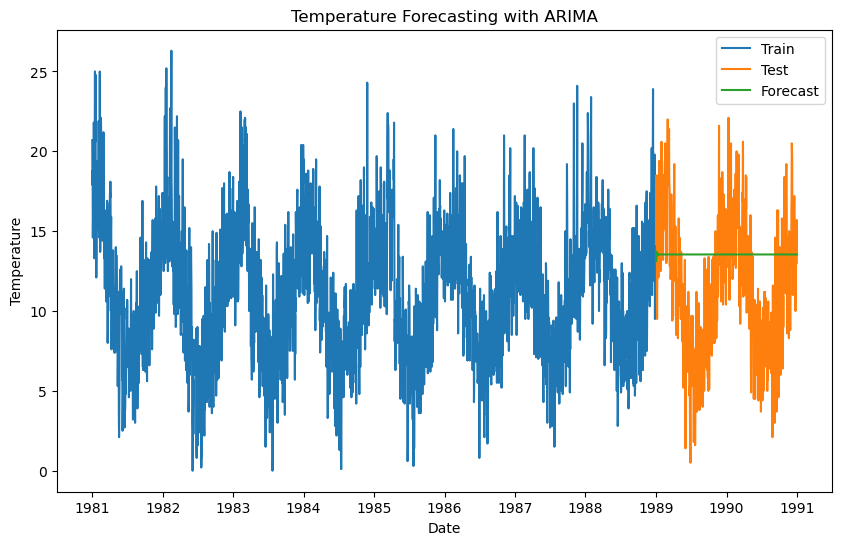

In [ ]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test['Temperature'], label='Test')
plt.plot(test['Forecast'], label='Forecast')
plt.title('Temperature Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [ ]:
# Calculate error
error = mean_squared_error(test['Temperature'], test['Forecast'])
print(f'Mean Squared Error: {error}')

Mean Squared Error: 21.128963334526414
